## Importing Packages

In [132]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

## Loading dataset

In [133]:
dataset = pd.read_csv("Mall_Customers.csv")

In [134]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preprocessing

## Encoding categorical variables

In [135]:
one_hot_encoded_data = pd.get_dummies(dataset, columns = ['Gender'])

In [136]:
data = one_hot_encoded_data.iloc[:,[2,3]]

In [137]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [138]:
data.shape

(200, 2)

## Elbow method to find the optimum number of K

In [139]:
d = {}
i = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++",random_state=42)
    kmeans.fit(data)
    i[k] = kmeans.inertia_
    d[k] = sum(np.min(cdist(data,kmeans.cluster_centers_,metric="euclidean"),axis=1))

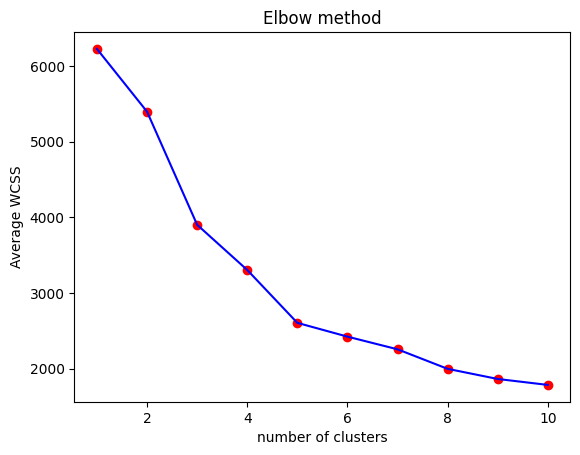

In [140]:
plt.plot(d.keys(),d.values(),color='blue')
plt.scatter(d.keys(),d.values(),color='red')
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("Average WCSS")
plt.show()

In [141]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=42)
kmeans.fit(data)
y_predict = kmeans.predict(data)

In [142]:
np.unique(y_predict)

array([0, 1, 2, 3, 4])

### Plotting the cluster

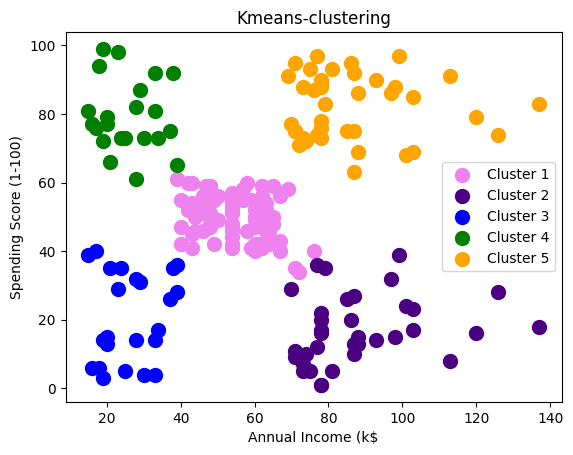

In [143]:
plt.scatter(data[y_predict==0].iloc[:,0],data[y_predict==0].iloc[:,1],s=100,c = 'violet', label = 'Cluster 1')
plt.scatter(data[y_predict==1].iloc[:,0],data[y_predict==1].iloc[:,1],s=100,c = 'indigo', label = 'Cluster 2')
plt.scatter(data[y_predict==2].iloc[:,0],data[y_predict==2].iloc[:,1],s=100,c = 'blue', label = 'Cluster 3')
plt.scatter(data[y_predict==3].iloc[:,0],data[y_predict==3].iloc[:,1],s=100,c = 'green', label = 'Cluster 4')
plt.scatter(data[y_predict==4].iloc[:,0],data[y_predict==4].iloc[:,1],s=100,c = 'orange', label = 'Cluster 5')
plt.title("Kmeans-clustering")
plt.xlabel("Annual Income (k$")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [145]:
final_data = pd.concat([dataset,pd.Series(data=y_predict,name="Classes")],axis=1)

In [147]:
final_data["Classes"].replace(to_replace=[0,1,2,3,4],value=["class1","class2","class3","class4","class5"],inplace=True)

In [148]:
final_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Classes
0,1,Male,19,15,39,class3
1,2,Male,21,15,81,class4
2,3,Female,20,16,6,class3
3,4,Female,23,16,77,class4
4,5,Female,31,17,40,class3
